# Classification

Many a time, instead of needing to predict a continuous variable, we may desire to predict a variable that has descrete values. In other words, we need to classify a new data point into one of a finite number of categories. The archetypical example for this kind of problem is a spam filter. Giant companies like Google and Microsoft who host email services need to have some sort of spam filter to block out unnecessary emails from there users. So, given some new email, we need to decide whether or not the email is spam. Like the problems we have seen so far, emails will need to have some *features*. Recall that features are just ways to describe an object. So far our email example, some features (word count, number of capitalized words, ect), can we train a machine learning models that decides what features decide whether an email is spam or not. This is the premise of classification. 

# Logistic Regression

One of the most important classification machine learning models is the logistic regression. The problem setup for logistic regression goes like this. Given some sets of data whose dependent variables is binary (two categories, usually yes or no), can we fit a function that gives us the probability that a new observation fall into one of the categories. This is where the logistic regression comes in. One thing you may have noticed right of the bat it that it is called logistic *regression*. Didn't we just finish regression? Well, yes. We are doing regression here, but it is only an intermediary step. Our regression curve represents the probabilties of falling into a given category. Let us make this concrete with an example which comes from the Wikipedia page on logistic regression (https://en.wikipedia.org/wiki/Logistic_regression). Our data set consists of the amount of hours a student spent studying and whether or not they passed the exam. We want to predict based on the number of hours studying if a student passed or not. Notice that our dependent variable is binary (they either passed, or they didn't). We are going to fit a curve that represents the probability that a student passed based on the number of ours they studied. This curve is shown below:
![log_reg](log_reg.jpg)
Again, note that the y-axis is the probability that a student passed given their score. Note that this is still not a classification problem. To turn it into one, we simply have a cutoff probability. 50% is a common cutoff. So if our regression line gives us a value of 0.5 or higher, then we say that a student passed. This cutoff score is up to the machine learning engineer. We would like to not get into too much math, but let us quickly go over the math. We are more than familiar with the linear regression equation, $y = B_0 + B_1x$. To apply logistic regression, we apply the sigmoid function to this data. The sigmoid function is has that *S* shape we saw in the example above and in general, the formula is $S(x) = \frac{1}{1+e^{-x}}$. Converting it to our notation, we get $p(x) = \frac{1}{1+e^{-x}}$ where *p* is the probability of being in the "yes" or '1' class. Note that the sigmoid function is bounded by 0 and 1, which is good because a probability must always be in the interval $[0,1]$. Solving the equation, we get $log(\frac{p}{1-p}) = B_0+B_1x$, which is what is solved to get our curve.

Let us use all of this to make an actual logistic regression model. The data for this example is social media ad data. We are trying to decide based on a users age and salary if they bought the product for some advertisment. First we import our data, fit our logistic regression on the train set, and make predictions on the test set.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Now that we have our predictions, we need to see how accurately our model performed. Since we have our predictions for the test set, as well as the actual results from the test set, we can compare how these two sets match up. This is generally done in what is called a confusion matrix. This following picture of a confusion matrix (from rasbt.github.io), is an excellent visualization of the confusion matrix.
![confusion_matrix](confusion_matrix.jpg)
This matrix breaks down not only how accurate our model was, but where the model was accurate, and where it messed up. This is why cofusion matrices are much more descriptive that accuracy alone. In python, the confusion matrix is simple.

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


We can match up this matrix with the image above to analyze our data. For example, we can see that our number of true positives (or the number of times our model guessed that a user would respond to the add, and then they did) was 65. 

All classification algorithms split up the data based on some decision boundary. It is often useful to visualize this decision boundary. The below code (though intimidating) does just that. By going through every point in the plot and running our classification algorithm on that point (then coloring accordingly) we get a nice representation of how our alogorithm split up the data. You notice that we have the same decision boundary for both graphs. This is because the decision boundary is based on the train data and is held stays the same when we move over to the test data. Further, you'll notice that the decision boundaries are lines. This is because, if you refer back to the original equation, we are really working with a linear regression, just performing a transform on it. 

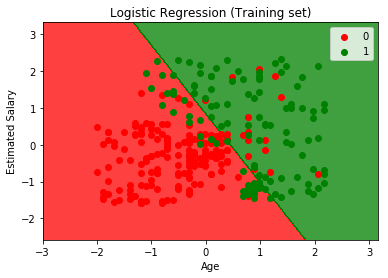

In [7]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

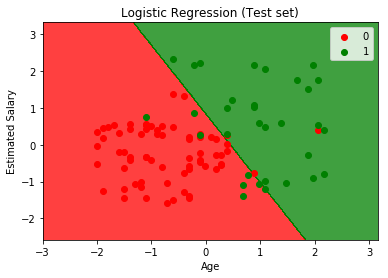

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# K-Nearest Neighbors

Contrary to logistic regression, our next algorithm is extremely simple. Again, this is a classification algorithm so our goal is to classify new data points. There are really only a few steps to this algorithm. The first step is to choose a number of neighbors, $k$. There are a variety of ways to choose $k$ but $5$ is a good start. Note that $k$ must always be odd for reasons that will come apparent momentarily. Given some new data point, we choose the $k$ points that are closest to our given point. A logical question is what to we mean by "close". The definition of close is up to the developer, but the simple euclidean distance is often a good place to start. Recall that the Euclidean distance between two points in 2-dimensions is $(x_1,y_1)$, $(x_2,y_2)$ is $\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$ and this works if we are in dimensions greater than 2, which we often are. Once we have the $k$ closest points, we find the majority classification and assign that to our new point. The python code is nearly identical to what is above, just swapping out logistic regression for K-NN. We will output our confusion matrix and our decision boundary graphs. Note that the "minkowski" distance metric with $p=2$ is just the Euclidian distance describe above. Also note that since K-nn is not a linear predictor, our decision boundary does not need to, and likely will not be, a straight line.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


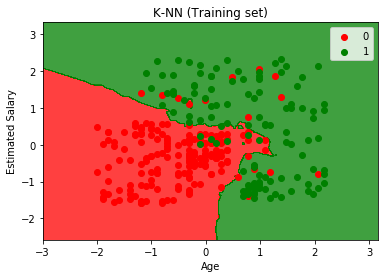

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

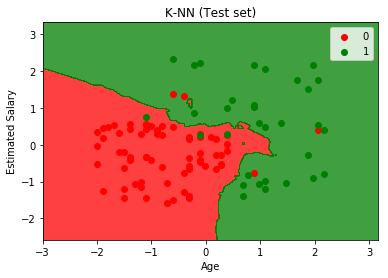

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

 # Support Vector Machines
 
 The intuition for support vector machines is simple. Given a set of data that belong to two different classes (binary classification), draw a line that splits up the data into its respective category. In other words, try to draw a line that splits the data to all of the data in one category lies on one side of the line, and all points in the other category are on the other side of the line. This of course presupposes that it is possible to draw such a line, and in fact this algorithm does presuppose this. Now, there could be many possible lines that achieve this, but the algorithm chooses the line that "maximizes the margin" between the closest points (the closest points here are called support vectors). In other words, the sum of the distance between the the closest points to the seperation boundary is maximized. SVM's are a little bit different from other machine learning algoriths. Instead of trying to learn from the obvious points in a data set (the points that clearly belong to one group of the other), the SVM tries to learn from the points that are very difficult to classify (those that belong to one class but are very similar to points in the other class). Because of this, SVM's often outperform other machine learning algorithms is some cases. The code is again identical, just swapping in our SVM classifier.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


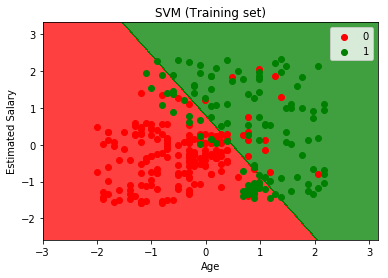

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

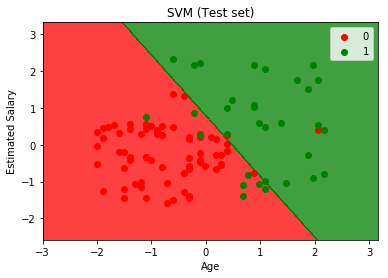

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()